<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/M%C3%A9todo_implicitoR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="ligtblue">Evelyn Tania Rojas Roa

---



# <font color='darkorange'>**Método implícito de Richardson**

---



### <font color='coral'> **Ecuación de calor**

$$\frac{\partial^2 u}{\partial x^2} +\frac{\partial u}{\partial t} = 0$$
Sujeta a:
$$u(0,t)=0,u(1,t)=0, \;\;\; t<1$$

$$
u(x,0) = sen (πx), 0≤ x ≤ 1 \quad
$$

Tomaremos los siguientes valores:
* $h= 0.1$
* $k = 0.01$

Solución exacta:

$$u(x,t) = \exp(-\pi^2 t) \sin(2\pi x)$$

Ulizamos la siguiente ecuación para obtener la matriz:

$$u_{i, j-1} = 3u_{i, j} - u_{i+1, j} - u_{i-1, j}$$

In [93]:
#Importamos las librerias necesarias
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para gráfica en 3D
from matplotlib import cm  # Para mapa de colores

In [94]:
#Definimos una función para la condición
def f(x):
    return np.sin(np.pi*x) #Cambia dependiendo la condición de cada problema

In [95]:
#Definimos la matriz obtenida del sistema
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

Ejercicio 1: Codificar la matriz A de manera más simple.

In [96]:
N = 9 #Tamaño de la matriz nxn (Varia dependiendo del problema)
A = sp.zeros(N) # Crea una matriz de 9x9 llena de ceros
# 2. Itera por cada fila
for i in range(N):
    A[i, i] = 3 #Añade "3" en la diagonal
    if i > 0:
        A[i, i - 1] = -1 # Pone el "-1" en la abajo diagonal
    if i < N - 1:
        A[i, i + 1] = -1 # Pone el '-1' en la arriba diagonal principal
# Imprime la matriz para verificar
sp.pprint(A) #Función especifica de sympy para mostrar la matriz de una manera más clara al imprimir

⎡3   -1  0   0   0   0   0   0   0 ⎤
⎢                                  ⎥
⎢-1  3   -1  0   0   0   0   0   0 ⎥
⎢                                  ⎥
⎢0   -1  3   -1  0   0   0   0   0 ⎥
⎢                                  ⎥
⎢0   0   -1  3   -1  0   0   0   0 ⎥
⎢                                  ⎥
⎢0   0   0   -1  3   -1  0   0   0 ⎥
⎢                                  ⎥
⎢0   0   0   0   -1  3   -1  0   0 ⎥
⎢                                  ⎥
⎢0   0   0   0   0   -1  3   -1  0 ⎥
⎢                                  ⎥
⎢0   0   0   0   0   0   -1  3   -1⎥
⎢                                  ⎥
⎣0   0   0   0   0   0   0   -1  3 ⎦


In [97]:
#Definimos nuestro vector b
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])

Ejercicio 2: Definir las entradas de b de manera más simple

In [98]:
from math import sin, pi
h=0.1 #el paso con el que se avanza en el eje x
b1 = sp.zeros(9, 1) #Definimos un vector relleno de ceros
n=9 #Igual que la n de la matriz definida anteriormente
for i in range (n):
  b1[i]=sin(pi*(i+1)*h) #esto depende de la condición dada
sp.pprint(b1)


⎡0.309016994374947⎤
⎢                 ⎥
⎢0.587785252292473⎥
⎢                 ⎥
⎢0.809016994374947⎥
⎢                 ⎥
⎢0.951056516295154⎥
⎢                 ⎥
⎢       1.0       ⎥
⎢                 ⎥
⎢0.951056516295154⎥
⎢                 ⎥
⎢0.809016994374947⎥
⎢                 ⎥
⎢0.587785252292473⎥
⎢                 ⎥
⎣0.309016994374948⎦


In [99]:
#Resolvemos el sistema apartir de la factorización LU
A.LUsolve(b) #La sintaxis A.LUsolve(b) es la forma que tiene sympy de resolver un sistema de ecuaciones lineales.

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [100]:
def richardson(A, b, j):
    S = [] #lista vacia para almacenar los resultados de cada iteración
    b_1 = b.copy() #almacena la solución del paso de tiempo anterior
    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  #np.array(b_1, dtype=float): Lo convierte a un array con números decimales
        #.reshape(-1): Se asegura de que sea un vector en 1D
        sol = A.LUsolve(b_1)
        b_1 = sol #se va actulizando el vector b_1
    return np.array(S)   # matriz resultado

In [101]:
j = 20 #Número de pasos en el tiempo

In [102]:
U=richardson(A, b, j)

Ejercicio 4: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta.

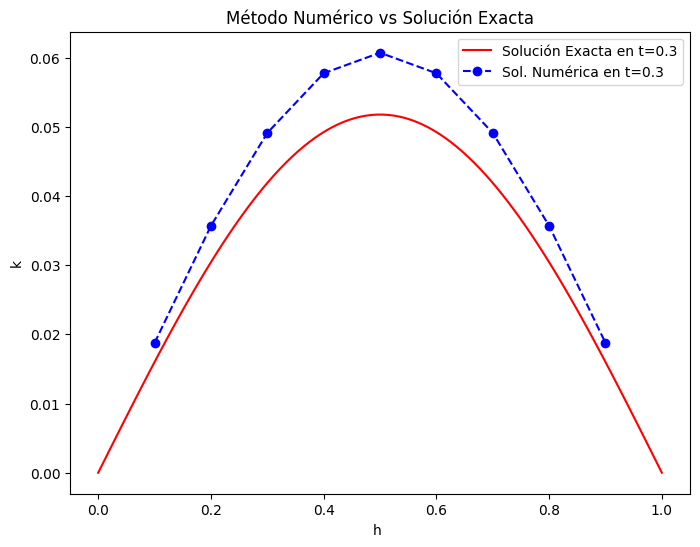

In [104]:
t_final = 0.3 # Elegimos un t>0
k = 0.01
j_pasos = int(t_final / k) #Calculamos cuántos pasos de tiempo (j) necesitamos para llegar al t elegido

#Ejecutamos la solución numérica
S_resultados = richardson(A, b1, j_pasos)
u_aprox = S_resultados[-1] # Solución en el t elegido

#Definimos la solución exacta
x_nodos = np.linspace(h, 1.0 - h, N)
x_vector = np.linspace(0, 1, 100) #Crea un arreglo de 100 números entre 0 y 1
u_exact = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x_vector)

#Gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_vector, u_exact, 'r-', label=f'Solución Exacta en t=0.3')
plt.plot(x_nodos, u_aprox, 'bo--', label=f"Sol. Numérica en t=0.3")
plt.title('Método Numérico vs Solución Exacta')
plt.xlabel('h ')
plt.ylabel('k')
plt.legend()
plt.show()

Ejercicio 5: ¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

No es necesario, debido a que en este problema se puede observar la **simetría** observando los valores que tenemos en nuestro vector b, por lo cual se podría reducir a un problema de 5x5, donde para completar los faltantes bastará con replicar los ya obtenidos. Esto se debe a dos cosas:
1. La condición inicial (sin(πx)) es más alta en el centro y baja exactamente igual hacia los dos lados.
2. Los bordes (0 y 0) también son simétricos.

In [105]:
x = np.linspace(0, 1, 9) #Número de nodos internos en x
y = np.linspace(0, 0.9, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

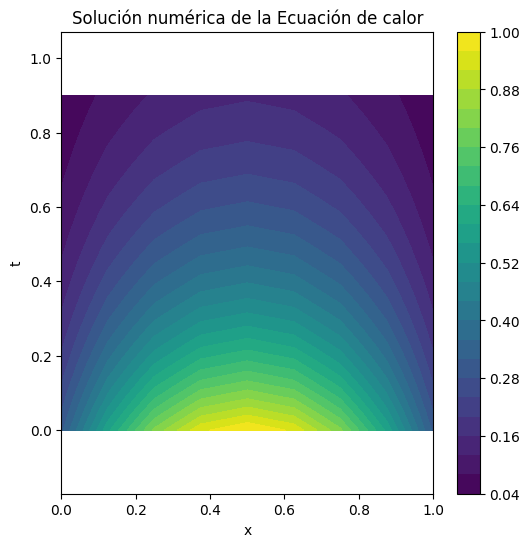

In [106]:
# Mapa de colores
plt.figure(figsize=(6, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de la Ecuación de calor')
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')
plt.show()

El mapa de calor muestra la difusión del calor. Es por eso que inicia con amarillo simunlando que esta caliente y conforme se va enfriando se empieza a tornar 'verde' con el paso del tiempo, el calor se disipa hasta que toda la barra se enfría y alcanza el equilibrio ( azul).

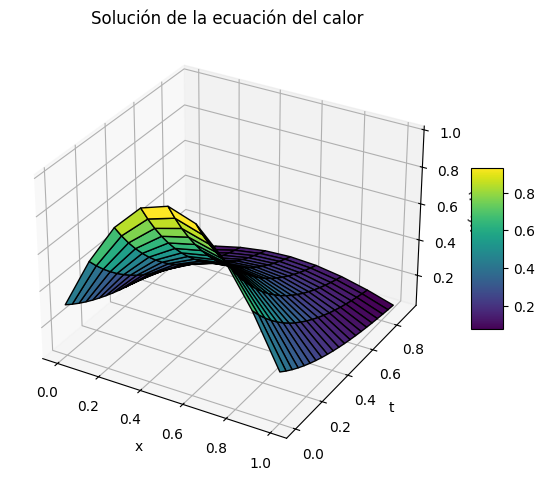

In [92]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
fig.colorbar(surf, shrink=0.3, aspect=5) #shrink=0.3 y aspect=5 son solo ajustes de tamaño para que la barra de color sea pequeña y delgada
plt.show()

Ejercicio 6: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

Ambas gráficas nos dan la idea visual de una aproximación muy certera, pero en realidad hay una baja resolución espacial dentro de la simulación. Debido que solo iniciamos contamos con 9 puntos de datos en el eje x.